In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os



In [64]:
file_path = 'credit_card_approval.csv'
df = pd.read_csv(file_path)
df.head()

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
df.isna().any()

ID                     False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_MOBIL             False
FLAG_WORK_PHONE        False
FLAG_PHONE             False
FLAG_EMAIL             False
JOB                    False
BEGIN_MONTHS           False
STATUS                 False
TARGET                 False
dtype: bool

In [ ]:
len(df.columns.tolist())

19

No missing data in all columns.

In [ ]:
# Jessie
# CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [ ]:
df['CODE_GENDER'].value_counts()
df['CODE_GENDER']= LabelEncoder().fit_transform(df['CODE_GENDER'])
df['CODE_GENDER']

0         0
1         0
2         1
3         0
4         1
         ..
537662    1
537663    0
537664    1
537665    1
537666    0
Name: CODE_GENDER, Length: 537667, dtype: int64

0 for female and 1 for man

In [ ]:
df['FLAG_OWN_CAR'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
df['FLAG_OWN_CAR'] = LabelEncoder().fit_transform(df['FLAG_OWN_CAR'])
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,0,1,N,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,0,0,N,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,1,1,Y,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,0,1,Y,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,1,1,Y,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0


1 for yes and 0 for no

In [ ]:
df['FLAG_OWN_REALTY'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
df['FLAG_OWN_REALTY'] = LabelEncoder().fit_transform(df['FLAG_OWN_REALTY'])
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,0,1,0,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,0,0,0,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,1,1,1,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,0,1,1,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,1,1,1,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0


1 for yes and 0 for no

In [ ]:
df['CNT_CHILDREN'].unique()

array(['2+ children', 'No children', '1 children'], dtype=object)

To encode the CNT_CHILDREN column as: 0 for "No children," 1 for "1 children," and 2 for "2+ children".

In [ ]:
cnt_children_mapping = {
    'No children': 0,
    '1 children': 1,
    '2+ children': 2
}

# Apply the mapping
df['CNT_CHILDREN'] = df['CNT_CHILDREN'].map(cnt_children_mapping)
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,0,1,0,2,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,0,0,0,0,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,1,1,1,0,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,0,1,1,1,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,1,1,1,2,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0


In [ ]:
df['AMT_INCOME_TOTAL']

0         270000.0
1          81000.0
2         270000.0
3         112500.0
4         139500.0
            ...   
537662    166500.0
537663    135000.0
537664    180000.0
537665    220500.0
537666    387000.0
Name: AMT_INCOME_TOTAL, Length: 537667, dtype: float64

In [ ]:
scaler = StandardScaler()
df['AMT_INCOME_TOTAL'] = scaler.fit_transform(df['AMT_INCOME_TOTAL'].values.reshape(-1, 1))
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,0,1,0,2,0.699862,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,0,0,0,0,-1.115022,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,1,1,1,0,0.699862,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,0,1,1,1,-0.812541,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,1,1,1,2,-0.553272,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0


In [ ]:
# use ordinal encoding for NAME_EDUCATION_TYPE
df['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [ ]:
name_education_type_mapping = {
    'Lower secondary': 0,
    'Secondary / secondary special': 1,
    'Incomplete higher': 2,
    'Higher education': 3,
    'Academic degree': 4
}
df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].map(name_education_type_mapping)
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,0,1,0,2,0.699862,1,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,0,0,0,0,-1.115022,1,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,1,1,1,0,0.699862,3,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,0,1,1,1,-0.812541,1,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,1,1,1,2,-0.553272,1,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0


In [ ]:
# Bobby
# NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, DAYS_BIRTH, DAYS_EMPLOYED, FLAG_MOBIL, FLAG_WORK_PHONE

In [ ]:
# NAME_FAMILY_STATUS
df['NAME_FAMILY_STATUS'].unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Separated',
       'Widow'], dtype=object)

In [ ]:
df = pd.get_dummies(df, columns=['NAME_FAMILY_STATUS'], prefix='FAMILY_STATUS')
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET,FAMILY_STATUS_Civil marriage,FAMILY_STATUS_Married,FAMILY_STATUS_Separated,FAMILY_STATUS_Single / not married,FAMILY_STATUS_Widow
0,5065438,0,1,0,2,0.699862,1,With parents,-13258,-2300,...,0,Managers,-6,C,0,False,True,False,False,False
1,5142753,0,0,0,0,-1.115022,1,House / apartment,-17876,-377,...,0,Private service staff,-4,0,0,False,False,False,True,False
2,5111146,1,1,1,0,0.699862,3,House / apartment,-19579,-1028,...,0,Laborers,0,C,0,False,True,False,False,False
3,5010310,0,1,1,1,-0.812541,1,House / apartment,-15109,-1956,...,0,Core staff,-3,0,0,False,True,False,False,False
4,5010835,1,1,1,2,-0.553272,1,House / apartment,-17281,-5578,...,0,Drivers,-29,0,0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537662,5142999,1,1,0,1,-0.294003,1,With parents,-12372,-5401,...,0,Core staff,-8,0,0,False,True,False,False,False
537663,5010773,0,0,1,0,-0.596484,3,With parents,-14160,-4635,...,0,Sales staff,-8,0,0,False,True,False,False,False
537664,5105601,1,0,1,0,-0.164368,3,House / apartment,-24204,-2462,...,0,Private service staff,-7,0,0,False,True,False,False,False
537665,5132833,1,1,0,0,0.224536,1,House / apartment,-22647,-3847,...,0,Laborers,-1,0,0,False,True,False,False,False


In [ ]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'JOB', 'BEGIN_MONTHS', 'STATUS', 'TARGET',
       'FAMILY_STATUS_Civil marriage', 'FAMILY_STATUS_Married',
       'FAMILY_STATUS_Separated', 'FAMILY_STATUS_Single / not married',
       'FAMILY_STATUS_Widow'],
      dtype='object')

In [ ]:
# NAME_HOUSING_TYPE
df['NAME_HOUSING_TYPE'].unique()

array(['With parents', 'House / apartment', 'Rented apartment',
       'Municipal apartment', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [ ]:
df = pd.get_dummies(df, columns=['NAME_HOUSING_TYPE'], prefix='HOUSING_TYPE')
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,...,FAMILY_STATUS_Married,FAMILY_STATUS_Separated,FAMILY_STATUS_Single / not married,FAMILY_STATUS_Widow,HOUSING_TYPE_Co-op apartment,HOUSING_TYPE_House / apartment,HOUSING_TYPE_Municipal apartment,HOUSING_TYPE_Office apartment,HOUSING_TYPE_Rented apartment,HOUSING_TYPE_With parents
0,5065438,0,1,0,2,0.699862,1,-13258,-2300,1,...,True,False,False,False,False,False,False,False,False,True
1,5142753,0,0,0,0,-1.115022,1,-17876,-377,1,...,False,False,True,False,False,True,False,False,False,False
2,5111146,1,1,1,0,0.699862,3,-19579,-1028,1,...,True,False,False,False,False,True,False,False,False,False
3,5010310,0,1,1,1,-0.812541,1,-15109,-1956,1,...,True,False,False,False,False,True,False,False,False,False
4,5010835,1,1,1,2,-0.553272,1,-17281,-5578,1,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537662,5142999,1,1,0,1,-0.294003,1,-12372,-5401,1,...,True,False,False,False,False,False,False,False,False,True
537663,5010773,0,0,1,0,-0.596484,3,-14160,-4635,1,...,True,False,False,False,False,False,False,False,False,True
537664,5105601,1,0,1,0,-0.164368,3,-24204,-2462,1,...,True,False,False,False,False,True,False,False,False,False
537665,5132833,1,1,0,0,0.224536,1,-22647,-3847,1,...,True,False,False,False,False,True,False,False,False,False


In [ ]:
# DAYS_BIRTH
df['DAYS_BIRTH'].unique()

array([-13258, -17876, -19579, ...,  -7489, -20216, -20806])

In [ ]:
print(f"DAYS_BIRTH's max is {max(df['DAYS_BIRTH'])}")
print(f"DAYS_BIRTH's min is {min(df['DAYS_BIRTH'])}")

DAYS_BIRTH's max is -7489
DAYS_BIRTH's min is -24611


In [ ]:
scaler = StandardScaler()
df['DAYS_BIRTH'] = scaler.fit_transform(df['DAYS_BIRTH'].values.reshape(-1, 1))
df['DAYS_BIRTH']

0         0.513099
1        -0.838610
2        -1.337086
3        -0.028697
4        -0.664451
            ...   
537662    0.772435
537663    0.249080
537664   -2.690844
537665   -2.235104
537666   -1.484316
Name: DAYS_BIRTH, Length: 537667, dtype: float64

In [ ]:
# DAYS_EMPLOYED
df['DAYS_EMPLOYED'].unique()

array([-2300,  -377, -1028, ..., -4420,  -797, -7765])

In [ ]:
scaler = MinMaxScaler()
df['DAYS_EMPLOYED'] = scaler.fit_transform(df['DAYS_EMPLOYED'].values.reshape(-1, 1))
df['DAYS_EMPLOYED']

0         0.854549
1         0.977064
2         0.935589
3         0.876465
4         0.645706
            ...   
537662    0.656983
537663    0.705785
537664    0.844228
537665    0.755989
537666    0.683869
Name: DAYS_EMPLOYED, Length: 537667, dtype: float64

In [ ]:
# FLAG_MOBIL
df['FLAG_MOBIL'].unique()

array([1])

In [ ]:
df = df.drop(columns=["FLAG_MOBIL"])
df.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,...,FAMILY_STATUS_Married,FAMILY_STATUS_Separated,FAMILY_STATUS_Single / not married,FAMILY_STATUS_Widow,HOUSING_TYPE_Co-op apartment,HOUSING_TYPE_House / apartment,HOUSING_TYPE_Municipal apartment,HOUSING_TYPE_Office apartment,HOUSING_TYPE_Rented apartment,HOUSING_TYPE_With parents
0,5065438,0,1,0,2,0.699862,1,0.513099,0.854549,0,...,True,False,False,False,False,False,False,False,False,True
1,5142753,0,0,0,0,-1.115022,1,-0.838610,0.977064,1,...,False,False,True,False,False,True,False,False,False,False
2,5111146,1,1,1,0,0.699862,3,-1.337086,0.935589,0,...,True,False,False,False,False,True,False,False,False,False
3,5010310,0,1,1,1,-0.812541,1,-0.028697,0.876465,0,...,True,False,False,False,False,True,False,False,False,False
4,5010835,1,1,1,2,-0.553272,1,-0.664451,0.645706,1,...,True,False,False,False,False,True,False,False,False,False


In [ ]:
# FLAG_WORK_PHONE
df['FLAG_WORK_PHONE'].unique()

array([0, 1])

In [ ]:
# Will
# FLAG_PHONE, FLAG_EMAIL, JOB, BEGIN_MONTHS, STATUS

In [ ]:
# FLAG_PHONE
df['FLAG_PHONE'].unique()

array([0, 1])

In [ ]:
# FLAG_EMAIL
df['FLAG_EMAIL'].unique()

array([0, 1])

In [ ]:
# JOB
df['JOB'].unique()

array(['Managers', 'Private service staff', 'Laborers', 'Core staff',
       'Drivers', 'High skill tech staff', 'Realty agents', 'Secretaries',
       'Accountants', 'Sales staff', 'Medicine staff',
       'Waiters/barmen staff', 'Low-skill Laborers', 'Cleaning staff',
       'HR staff', 'Cooking staff', 'Security staff', 'IT staff'],
      dtype=object)

In [ ]:
df = pd.get_dummies(df, columns=['JOB'], prefix='JOB')
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,...,JOB_Laborers,JOB_Low-skill Laborers,JOB_Managers,JOB_Medicine staff,JOB_Private service staff,JOB_Realty agents,JOB_Sales staff,JOB_Secretaries,JOB_Security staff,JOB_Waiters/barmen staff
0,5065438,0,1,0,2,0.699862,1,0.513099,0.854549,0,...,False,False,True,False,False,False,False,False,False,False
1,5142753,0,0,0,0,-1.115022,1,-0.838610,0.977064,1,...,False,False,False,False,True,False,False,False,False,False
2,5111146,1,1,1,0,0.699862,3,-1.337086,0.935589,0,...,True,False,False,False,False,False,False,False,False,False
3,5010310,0,1,1,1,-0.812541,1,-0.028697,0.876465,0,...,False,False,False,False,False,False,False,False,False,False
4,5010835,1,1,1,2,-0.553272,1,-0.664451,0.645706,1,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# BEGIN_MONTHS
df['BEGIN_MONTHS'].unique()

array([ -6,  -4,   0,  -3, -29, -25, -19, -18, -43, -38, -15, -30, -26,
        -8, -39, -12, -52,  -7, -20, -35, -32,  -2, -11, -10, -13, -33,
       -34, -31,  -1, -23, -27, -22, -28,  -5, -36,  -9, -16, -14, -17,
       -24, -37, -44, -47, -48, -21, -42, -50, -51, -54, -40, -41, -55,
       -46, -58, -49, -53, -56, -57, -45, -59, -60])

In [ ]:
scaler = StandardScaler()
df['BEGIN_MONTHS'] = scaler.fit_transform(df[['BEGIN_MONTHS']].values.reshape(-1, 1))
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,...,JOB_Laborers,JOB_Low-skill Laborers,JOB_Managers,JOB_Medicine staff,JOB_Private service staff,JOB_Realty agents,JOB_Sales staff,JOB_Secretaries,JOB_Security staff,JOB_Waiters/barmen staff
0,5065438,0,1,0,2,0.699862,1,0.513099,0.854549,0,...,False,False,True,False,False,False,False,False,False,False
1,5142753,0,0,0,0,-1.115022,1,-0.838610,0.977064,1,...,False,False,False,False,True,False,False,False,False,False
2,5111146,1,1,1,0,0.699862,3,-1.337086,0.935589,0,...,True,False,False,False,False,False,False,False,False,False
3,5010310,0,1,1,1,-0.812541,1,-0.028697,0.876465,0,...,False,False,False,False,False,False,False,False,False,False
4,5010835,1,1,1,2,-0.553272,1,-0.664451,0.645706,1,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df['BEGIN_MONTHS']

0         0.947814
1         1.090287
2         1.375231
3         1.161523
4        -0.690617
            ...   
537662    0.805342
537663    0.805342
537664    0.876578
537665    1.303995
537666   -1.830396
Name: BEGIN_MONTHS, Length: 537667, dtype: float64

In [ ]:
# STATUS
df['STATUS'].unique()

array(['C', '0', 'X', '2', '1', '5', '3', '4'], dtype=object)

In [ ]:
# Ordinal mapping
status_mapping = {
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    'C': -1,  # Paid off
    'X': -2   # No loan
}
df['STATUS'] = df['STATUS'].map(status_mapping)
df['STATUS']

0        -1
1         0
2        -1
3         0
4         0
         ..
537662    0
537663    0
537664    0
537665    0
537666   -1
Name: STATUS, Length: 537667, dtype: int64

In [ ]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,...,JOB_Laborers,JOB_Low-skill Laborers,JOB_Managers,JOB_Medicine staff,JOB_Private service staff,JOB_Realty agents,JOB_Sales staff,JOB_Secretaries,JOB_Security staff,JOB_Waiters/barmen staff
0,5065438,0,1,0,2,0.699862,1,0.513099,0.854549,0,...,False,False,True,False,False,False,False,False,False,False
1,5142753,0,0,0,0,-1.115022,1,-0.838610,0.977064,1,...,False,False,False,False,True,False,False,False,False,False
2,5111146,1,1,1,0,0.699862,3,-1.337086,0.935589,0,...,True,False,False,False,False,False,False,False,False,False
3,5010310,0,1,1,1,-0.812541,1,-0.028697,0.876465,0,...,False,False,False,False,False,False,False,False,False,False
4,5010835,1,1,1,2,-0.553272,1,-0.664451,0.645706,1,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().any()

ID                                    False
CODE_GENDER                           False
FLAG_OWN_CAR                          False
FLAG_OWN_REALTY                       False
CNT_CHILDREN                          False
AMT_INCOME_TOTAL                      False
NAME_EDUCATION_TYPE                   False
DAYS_BIRTH                            False
DAYS_EMPLOYED                         False
FLAG_WORK_PHONE                       False
FLAG_PHONE                            False
FLAG_EMAIL                            False
BEGIN_MONTHS                          False
STATUS                                False
TARGET                                False
FAMILY_STATUS_Civil marriage          False
FAMILY_STATUS_Married                 False
FAMILY_STATUS_Separated               False
FAMILY_STATUS_Single / not married    False
FAMILY_STATUS_Widow                   False
HOUSING_TYPE_Co-op apartment          False
HOUSING_TYPE_House / apartment        False
HOUSING_TYPE_Municipal apartment

In [ ]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'BEGIN_MONTHS', 'STATUS', 'TARGET', 'FAMILY_STATUS_Civil marriage',
       'FAMILY_STATUS_Married', 'FAMILY_STATUS_Separated',
       'FAMILY_STATUS_Single / not married', 'FAMILY_STATUS_Widow',
       'HOUSING_TYPE_Co-op apartment', 'HOUSING_TYPE_House / apartment',
       'HOUSING_TYPE_Municipal apartment', 'HOUSING_TYPE_Office apartment',
       'HOUSING_TYPE_Rented apartment', 'HOUSING_TYPE_With parents',
       'JOB_Accountants', 'JOB_Cleaning staff', 'JOB_Cooking staff',
       'JOB_Core staff', 'JOB_Drivers', 'JOB_HR staff',
       'JOB_High skill tech staff', 'JOB_IT staff', 'JOB_Laborers',
       'JOB_Low-skill Laborers', 'JOB_Managers', 'JOB_Medicine staff',
       'JOB_Private service staff', 'JOB_Realty agents', 'JOB_Sales staff',
       'JOB_Secretaries', 

In [ ]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,...,JOB_Laborers,JOB_Low-skill Laborers,JOB_Managers,JOB_Medicine staff,JOB_Private service staff,JOB_Realty agents,JOB_Sales staff,JOB_Secretaries,JOB_Security staff,JOB_Waiters/barmen staff
0,5065438,0,1,0,2,0.699862,1,0.513099,0.854549,0,...,False,False,True,False,False,False,False,False,False,False
1,5142753,0,0,0,0,-1.115022,1,-0.838610,0.977064,1,...,False,False,False,False,True,False,False,False,False,False
2,5111146,1,1,1,0,0.699862,3,-1.337086,0.935589,0,...,True,False,False,False,False,False,False,False,False,False
3,5010310,0,1,1,1,-0.812541,1,-0.028697,0.876465,0,...,False,False,False,False,False,False,False,False,False,False
4,5010835,1,1,1,2,-0.553272,1,-0.664451,0.645706,1,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = df.drop(columns=['ID', 'TARGET'])
y = df['TARGET']
y.value_counts()

TARGET
0    535705
1      1962
Name: count, dtype: int64

In [ ]:
intdf = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)
# intdf.head()
correlation_matrix = intdf.corr()  # Computes Pearson correlation by default
target_corr = correlation_matrix['TARGET'].sort_values(ascending=False)
print(target_corr)

C:\Users\jessi\AppData\Local\Temp\ipykernel_26332\244931222.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  intdf = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)


TARGET                                1.000000
STATUS                                0.350245
JOB_Security staff                    0.025019
DAYS_EMPLOYED                         0.019230
JOB_Low-skill Laborers                0.017637
CODE_GENDER                           0.016732
ID                                    0.016717
FAMILY_STATUS_Single / not married    0.013763
JOB_IT staff                          0.010093
FLAG_PHONE                            0.008663
HOUSING_TYPE_Co-op apartment          0.006855
FAMILY_STATUS_Widow                   0.005650
FLAG_OWN_REALTY                       0.005364
HOUSING_TYPE_Municipal apartment      0.005352
NAME_EDUCATION_TYPE                   0.005019
FLAG_WORK_PHONE                       0.004353
HOUSING_TYPE_Office apartment         0.003811
FLAG_OWN_CAR                          0.003076
JOB_High skill tech staff             0.003019
AMT_INCOME_TOTAL                      0.002887
JOB_Drivers                           0.002715
JOB_Managers 

In [ ]:

X_no_status = X.drop(columns=['STATUS'])

In [ ]:
# Use logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score

X_train shape: (376366, 41)
X_test shape: (161301, 41)
y_train shape: (376366,)
y_test shape: (161301,)
Accuracy: 0.6376

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.64      0.78    160712
           1       0.01      0.61      0.01       589

    accuracy                           0.64    161301
   macro avg       0.50      0.62      0.40    161301
weighted avg       0.99      0.64      0.78    161301


Confusion Matrix:
 [[102480  58232]
 [   229    360]]
Confusion Matrix:
[[102480  58232]
 [   229    360]]


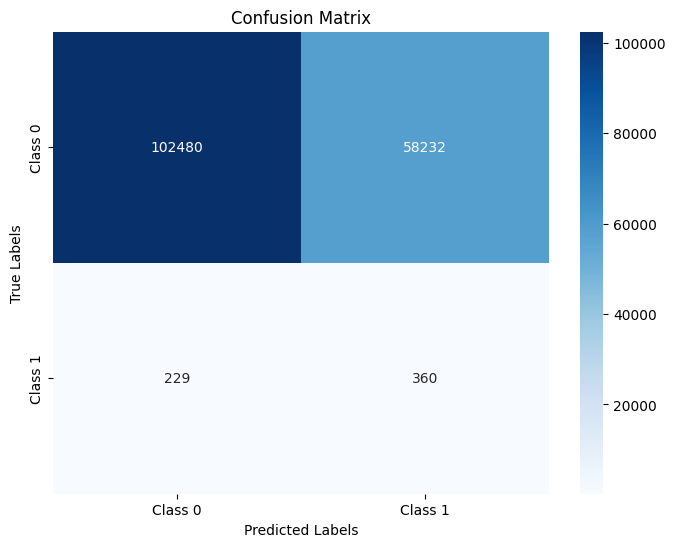

In [ ]:
# now we apply our balance data to the logistic regression we did it before 
# to see some differences.
x = pd.get_dummies(X_no_status, drop_first=True)

# Split the balance data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Initialize and fit the logistic regression model using balance data
model = LogisticRegression(class_weight='balanced', max_iter=1000)  # Increase max_iter if convergence warnings occur
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

X_train shape: (376366, 1)
X_test shape: (161301, 1)
y_train shape: (376366,)
y_test shape: (161301,)
Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    160712
           1       1.00      1.00      1.00       589

    accuracy                           1.00    161301
   macro avg       1.00      1.00      1.00    161301
weighted avg       1.00      1.00      1.00    161301


Confusion Matrix:
 [[160712      0]
 [     0    589]]
Confusion Matrix:
[[160712      0]
 [     0    589]]


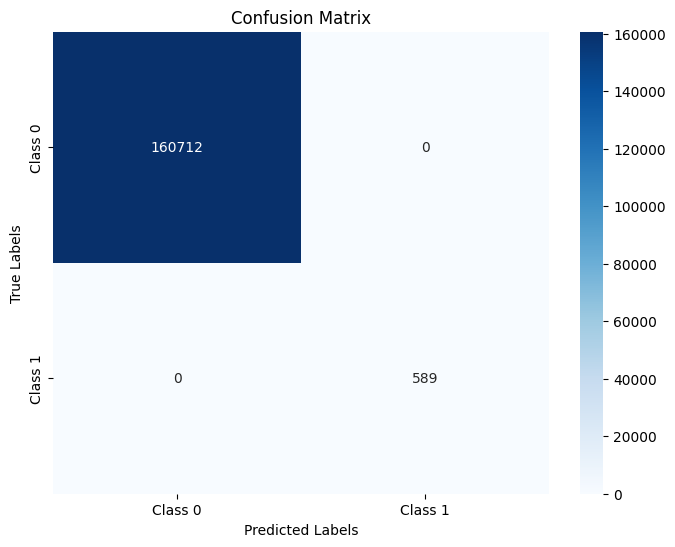

In [ ]:
# now we apply our balance data to the logistic regression we did it before 
# to see some differences.
x = pd.get_dummies(df[['STATUS']], drop_first=True)

# Split the balance data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Initialize and fit the logistic regression model using balance data
model = LogisticRegression(class_weight='balanced', max_iter=1000)  # Increase max_iter if convergence warnings occur
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# in order to due with our imbalance data, we consider use 
# RandomOverSampler (we learn in HWs) to make it a balance data
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)


In [ ]:
# after apply RandomOverSampler, we can see that the new data size 
# increase and is not imbalance now.
y_resampled.value_counts()

TARGET
0    535705
1    535705
Name: count, dtype: int64

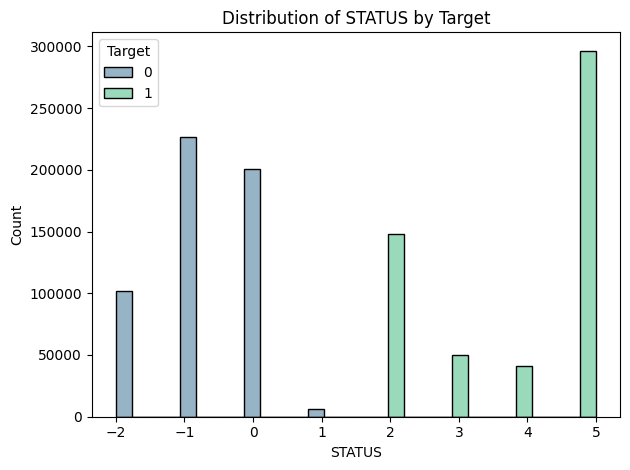

In [ ]:
# Prepare the data
data = X_resampled[['STATUS']].copy()
data['Target'] = y_resampled

# Plot histogram for the single feature
sns.histplot(
    data=data,
    x='STATUS',
    hue='Target',
    kde=False,
    palette='viridis',
    bins=30
)

# Add labels and title
plt.title('Distribution of STATUS by Target')
plt.xlabel('STATUS')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


X_train shape: (749987, 41)
X_test shape: (321423, 41)
y_train shape: (749987,)
y_test shape: (321423,)
Accuracy: 0.6102

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.64      0.62    160712
           1       0.62      0.58      0.60    160711

    accuracy                           0.61    321423
   macro avg       0.61      0.61      0.61    321423
weighted avg       0.61      0.61      0.61    321423


Confusion Matrix:
 [[103108  57604]
 [ 67697  93014]]
Confusion Matrix:
[[103108  57604]
 [ 67697  93014]]


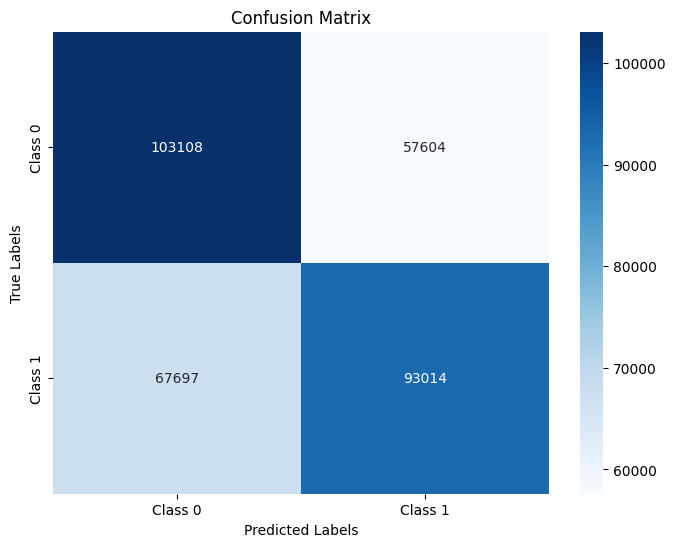

In [ ]:
# now we apply our balance data to the logistic regression we did it before 
# to see some differences.
X = pd.get_dummies(X_resampled.drop(columns=['STATUS']), drop_first=True)

# Split the balance data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Initialize and fit the logistic regression model using balance data
model = LogisticRegression(class_weight='balanced', max_iter=1000)  # Increase max_iter if convergence warnings occur
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Now we can see that the confusion matrix is not skew and TN and TP were balance which improving model preformance on predict both class 1 and class 0.

In [ ]:

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, make_scorer
from sklearn.model_selection import GridSearchCV

In [ ]:
# next, we apply balance data on the XGBClassifier model again to observe its output
param_grid = {
    'n_estimators': [50, 100,150,200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_child_weight': [3, 5],
    'gamma': [0, 0.1],
    'scale_pos_weight': [(len(y_train) - sum(y_train)) / sum(y_train)]  # Adjust imbalance
}


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# use grid_search to find out the best parameter for XGBClassifier.
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=make_scorer(accuracy_score),
    cv=3,
    verbose=1,
    n_jobs=-1
)

# fit the balance data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the tuned model
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 64 candidates, totalling 192 fits


KeyboardInterrupt: 

Training Error: 0.0
Test Error: 0.0
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    160712
           1       1.00      1.00      1.00    160711

    accuracy                           1.00    321423
   macro avg       1.00      1.00      1.00    321423
weighted avg       1.00      1.00      1.00    321423

Confusion Matrix:
[[160712      0]
 [     0 160711]]


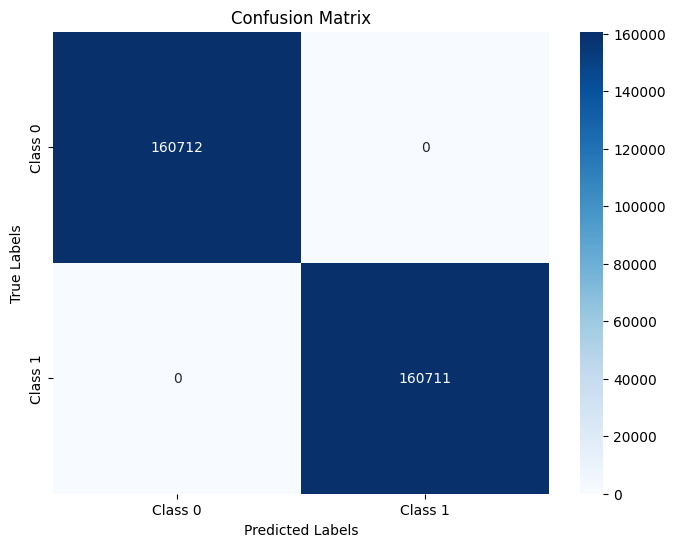

In [ ]:
# Predictions on training and test sets
train_pred = best_model.predict(X_train)
test_pred = best_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

train_error = 1 - train_accuracy
test_error = 1 - test_accuracy

print(f"Training Error: {train_error}")
print(f"Test Error: {test_error}")


# Classification report
print("Test Classification Report:")
print(classification_report(y_test, test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, test_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
